In [1]:
import os
import time
import tensorflow as tf
from tensorflow.keras import models, layers, Model, callbacks
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from process_data import process_data

In [2]:
data = process_data()

In [3]:
for k, v in data.items():
    print(k)
    print(type(v))

x_train
<class 'numpy.ndarray'>
x_train_processed
<class 'numpy.ndarray'>
x_test
<class 'numpy.ndarray'>
x_test_processed
<class 'numpy.ndarray'>
y_train
<class 'numpy.ndarray'>
y_test
<class 'numpy.ndarray'>
pipeline
<class 'sklearn.pipeline.Pipeline'>


In [4]:
x_train_processed = data['x_train_processed']
y_train = data['y_train']

In [5]:
x_train_processed.shape

(1047, 11)

> note: old model constrution, using Sequential API

In [6]:
#model = models.Sequential()
#model.add(layers.Dense(32, activation='relu', input_shape=(x_train_processed.shape[1],)))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))


> changed to functional API --> more flexibility, for future expansion

In [7]:
input_ = layers.Input(shape=x_train_processed.shape[1:])
hidden_0 = layers.Dense(64, activation='relu')(input_)
hidden_1 = layers.Dense(64, activation='relu')(hidden_0)
hidden_2 = layers.Dense(32, activation='relu')(hidden_1)
hidden_3 = layers.Dense(16, activation='relu')(hidden_2)
output = layers.Dense(1, activation='sigmoid')(hidden_3)
model = Model(inputs=[input_], outputs=[output])

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 7,553
Trainable params: 7,553
Non-trainable params: 0
___________________________________________________________

In [10]:
# tensorboard logs callback

root_logdir = os.path.join(os.curdir, 'custom_logs')


def logdir(hyperparam_note=None) -> str:
    
    
    run_d = time.strftime(f'run_%Y_%m_%d-%H_%M_%S{"_" + hyperparam_note if hyperparam_note is not None else ""}')
    
    directory = os.path.join(root_logdir, run_d)
    
    return directory
    
    
logdir('changed_batch_size_32')

'./custom_logs/run_2021_10_06-19_01_48_changed_batch_size_32'

In [14]:
%load_ext tensorboard
%tensorboard --logdir ./custom_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [12]:
use_callbacks = [
    callbacks.ModelCheckpoint(
        './models/titanic_nn.h5',
        monitor='val_accuracy',
        save_best_only=True),
    callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=10,
        restore_best_weights=True),
    callbacks.TensorBoard(logdir())
]

history = model.fit(
    x_train_processed, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    verbose=1,
    validation_split=.2,
    callbacks=use_callbacks
)

Epoch 1/100
27/27 [==============================] - 1s 24ms/step - loss: 0.5806 - accuracy: 0.7479 - val_loss: 0.6059 - val_accuracy: 0.7190
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 0.4790 - accuracy: 0.7981 - val_loss: 0.5748 - val_accuracy: 0.7238
Epoch 3/100
27/27 [==============================] - 0s 12ms/step - loss: 0.4514 - accuracy: 0.8005 - val_loss: 0.6104 - val_accuracy: 0.7619
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.4393 - accuracy: 0.8053 - val_loss: 0.5583 - val_accuracy: 0.7238
Epoch 5/100
27/27 [==============================] - 0s 8ms/step - loss: 0.4285 - accuracy: 0.8124 - val_loss: 0.5270 - val_accuracy: 0.7381
Epoch 6/100
27/27 [==============================] - 0s 8ms/step - loss: 0.4172 - accuracy: 0.8256 - val_loss: 0.5264 - val_accuracy: 0.7857
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 0.4184 - accuracy: 0.8268 - val_loss: 0.5131 - val_accuracy: 0.7905
Epoch 8/100

<AxesSubplot:>

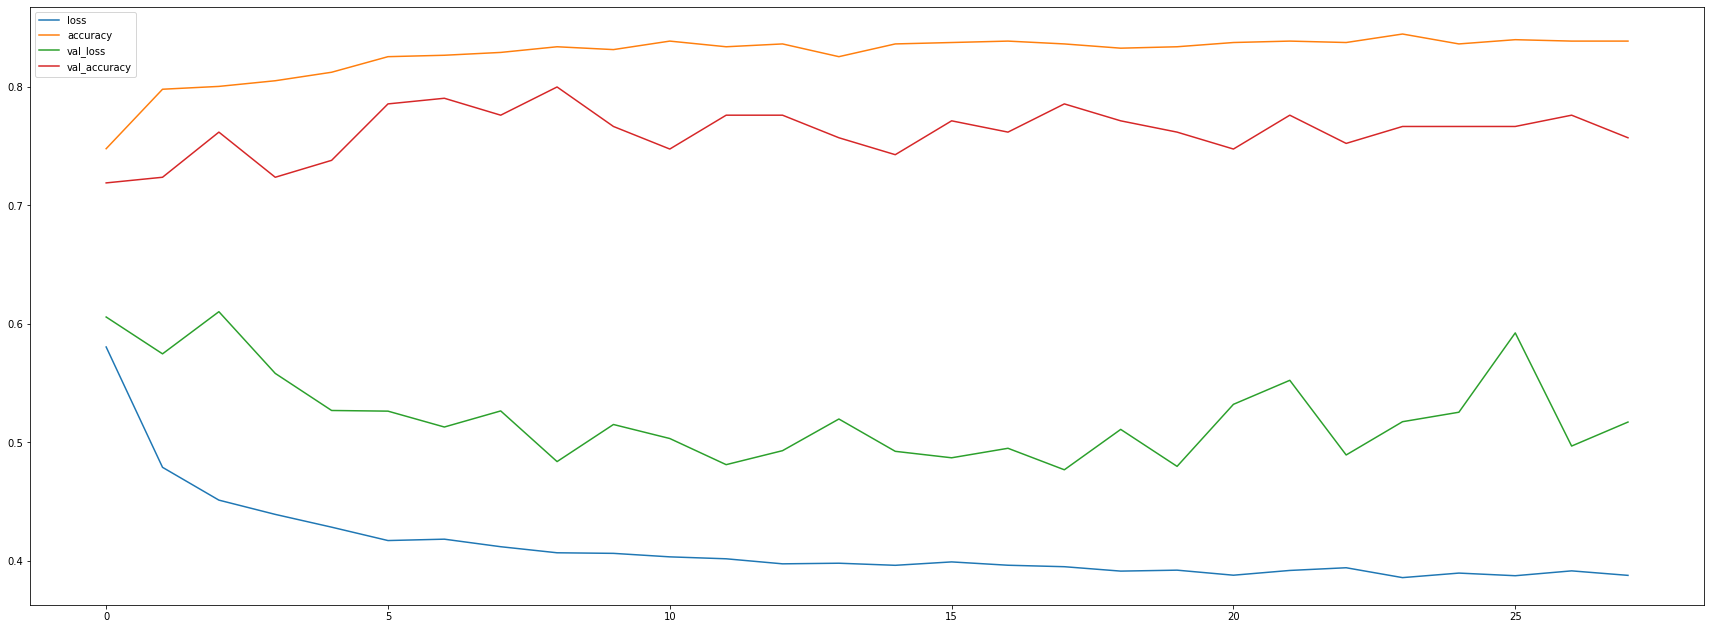

In [15]:
#epochs = range(len(history.history['loss']))
#loss = history.history['loss']

df = pd.DataFrame(data=history.history)

df.plot(figsize=(30, 11))

In [16]:
model.evaluate(data['x_test_processed'], data['y_test'])

9/9 [==============================] - 0s 18ms/step - loss: 0.4922 - accuracy: 0.7786


[0.49221912026405334, 0.7786259651184082]

> todo next - function to build model, sklearn wrapper from keras, pipelines, random grid search for model!